# Tutorial: detecting long-tail (rare) samples in a dataset

### Q: What are long-tail samples?

A figure below illustrates what are high-frequency features and long-tailed features. 

Long-tailed features appear to have a low-frequency in the data and tend to be under-fitted by the deep neural nets. Hence, bad performed.

/home/jiaheng/docta_opensource/fix_issue/docta


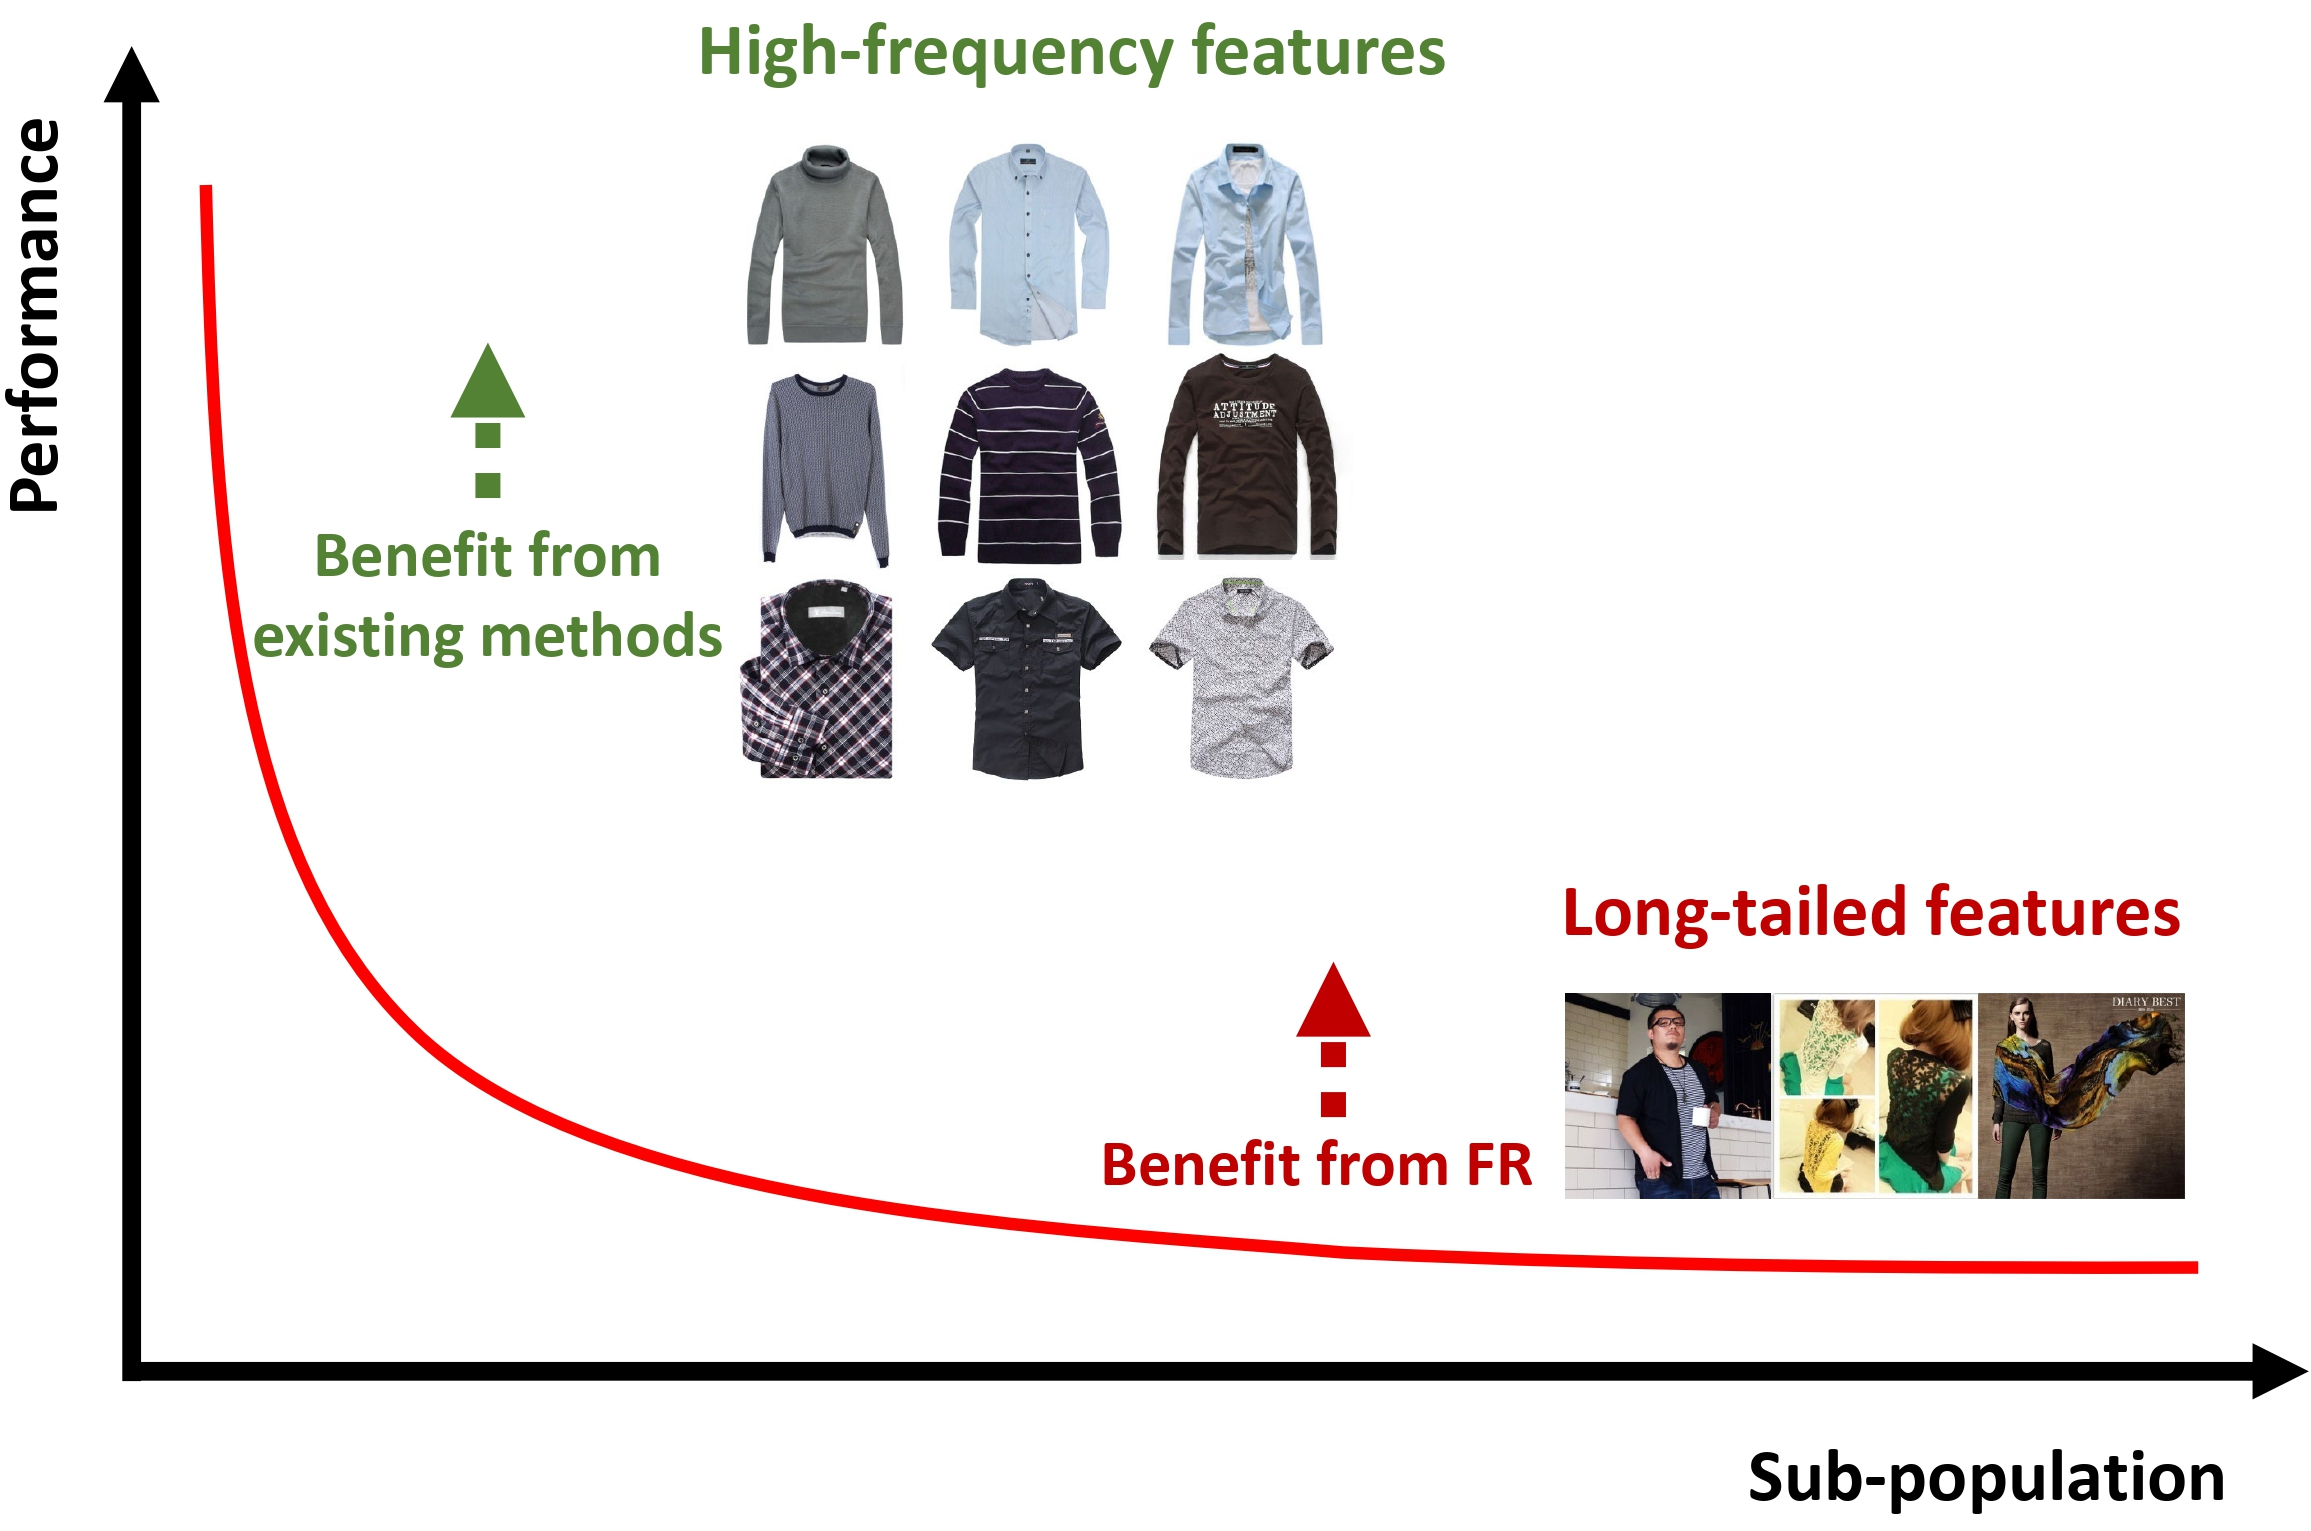

In [1]:
import sys
import os
os.chdir('..')
o_path = os.getcwd()
print(o_path)
sys.path.append(o_path) # set path so that modules from other foloders can be loaded
from IPython.display import Image
display(Image(filename='demo_imgs/long-tail-sample.jpg', width = 400, height = 200))

This tutorial introduces how Docta helps you finding long-tail rare samples in a dataset via feature embeddings:

### Use embeddings to detect long-tail samples (CIFAR-10)

**Basic intuition**: 

Consider the averaged distance between each sample and its $k$ nearest neighbors;

**Long-tail samples**: 

A sample with a larger distance by referring to its neighbors (embedding perspective) is likely to be a long-tail/rare sample.


**Pros**: 

* General: works for any data that could be extraced as embeddings! 

* Fast: get embeddings and produce long-tail scores fast!

* Insight: embeddings are key and poopular components for depicting data samples!

**Step 1** get long-tailed scores with pre-defined configs.

In [3]:
%run ./tools/docta_rare_pattern.py --feature_type 'embedding'

==== Docta: Doctor for your data. Current version: 0.0 ====
Files already downloaded and verified


49it [07:30,  9.19s/it]


Save 49 instances to ./results/CIFAR_c10/embedded_CIFAR_c10_0.pt
[0, 1]
idx range for training data [0]
#Samples (dataset-train) 50000.
Customizing the extracted embeddings as a dataset...
Getting consensus patterns...
Long-tail score saved to ./results/CIFAR_c10/embedding.csv


**Step2** Take a look at the long-tail scores and samples

In [4]:
import pandas as pd
lt_score_embedd = pd.read_csv('./results/CIFAR_c10/embedding.csv')
lt_score_embedd.head()

,idx,longtail_scores
0,0,0.0701
1,1,0.0688
2,2,0.0917
3,3,0.0654
4,4,0.0658


In [5]:
# A help function for visualization
# %matplotlib notebook
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
def visualize_lt(idxs, data, labels, label_name):
    plt.rcParams["figure.figsize"] = (10,8)
    size = len(idxs)
    width = int(size / 5)
    for i in range(size):
        ax = plt.subplot(width,5,i+1)
        idx = idxs[i]
        ax.imshow(data.feature[idx])
        ax.set_title(f"{label_name[labels[idx]]}")
        ax.axis('off')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


### Visualization of long-tail images (top 20 among 50K)

Files already downloaded and verified


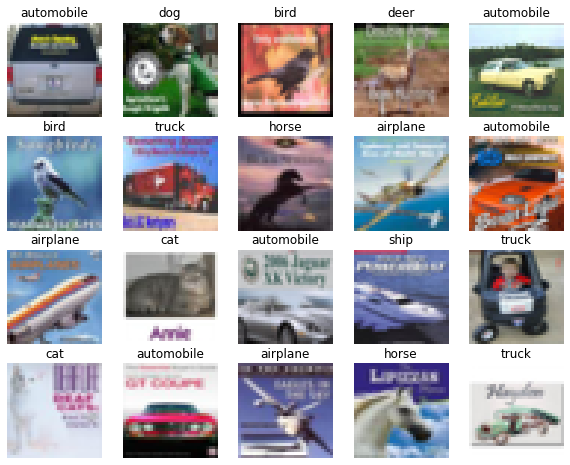

In [6]:

dataset = Cifar10_clean(cfg, train=True)
clean_label = dataset.label
feature = dataset.feature 
label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_show = 20 # show 20 pics
lt_score = lt_score_embedd['longtail_scores'].tolist()
topN = sorted(range(len(lt_score)), key = lambda sub: lt_score[sub])[-num_show:]
visualize_lt(idxs=topN, data=dataset, labels=clean_label, label_name=label_name)

In [7]:
print(f"Indexes of {len(topN)} samples with highest long-tail scores are {topN}")

Indexes of 20 samples with highest long-tail scores are [39275, 22848, 42601, 12331, 16412, 46389, 30936, 8619, 49656, 47362, 35658, 41159, 137, 46015, 48151, 21510, 21976, 31284, 9079, 38848]


### Visualization of head images (top 20 among 50K)

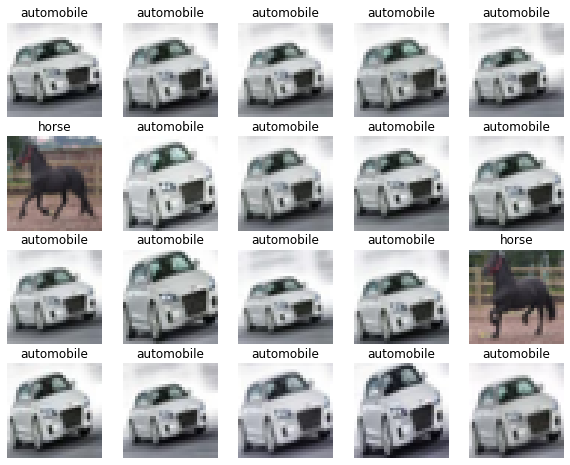

In [8]:
lastN = sorted(range(len(lt_score)), key = lambda sub: lt_score[sub])[:num_show]
visualize_lt(idxs=lastN, data=dataset, labels=clean_label, label_name=label_name)

In [9]:
print(f"Indexes of {len(lastN)} samples with lowest long-tail scores are {lastN}")

Indexes of 20 samples with lowest long-tail scores are [22479, 33063, 5834, 48612, 119, 46988, 15462, 18927, 30570, 42637, 29791, 44097, 14501, 14524, 44753, 27792, 20079, 49426, 21003, 26742]


### The distribution of the per-sample long-tail scores 

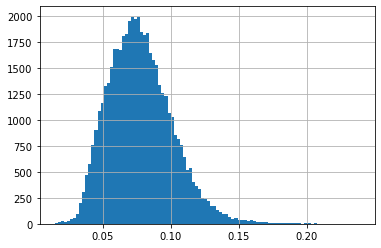

In [10]:
lt_score_embedd['longtail_scores'].hist(bins=100, figsize=[6,4])